# Performance Analysis

In [1]:
from data_loader import read_market_data
from engine import TradingEngine
from strategies import MomentumStrategy, MovingAverageCrossOver
from reporting import calculate_total_return, calculate_periodic_return, calculate_sharpe_ratio, calculate_max_drawdown, print_performance_report
import matplotlib.pyplot as plt
import statistics
import math

# Constants
FILENAME = 'market_data.csv'
INITIAL_CASH = 10000.0


### The actual Code for the engine

In [ ]:
# Loading the data + Simulation
market_data_ticks = read_market_data(FILENAME)
print(market_data_ticks)

momentum_strategy = MomentumStrategy(window=15)
crossover_strategy = MovingAverageCrossOver(short_window=10, long_window=30)
strategies = [momentum_strategy, crossover_strategy]

engine1 = TradingEngine([momentum_strategy],{}, INITIAL_CASH)
engine2 = TradingEngine([crossover_strategy],{}, INITIAL_CASH)

engine1.run(market_data_ticks)
engine2.run(market_data_ticks)

#### Calculate and display metrics 

In [ ]:

print_performance_report(engine1, "Momentum Strategy")

print_performance_report(engine2, "Crossover Strategy")

##### Plot the 3 Strategies

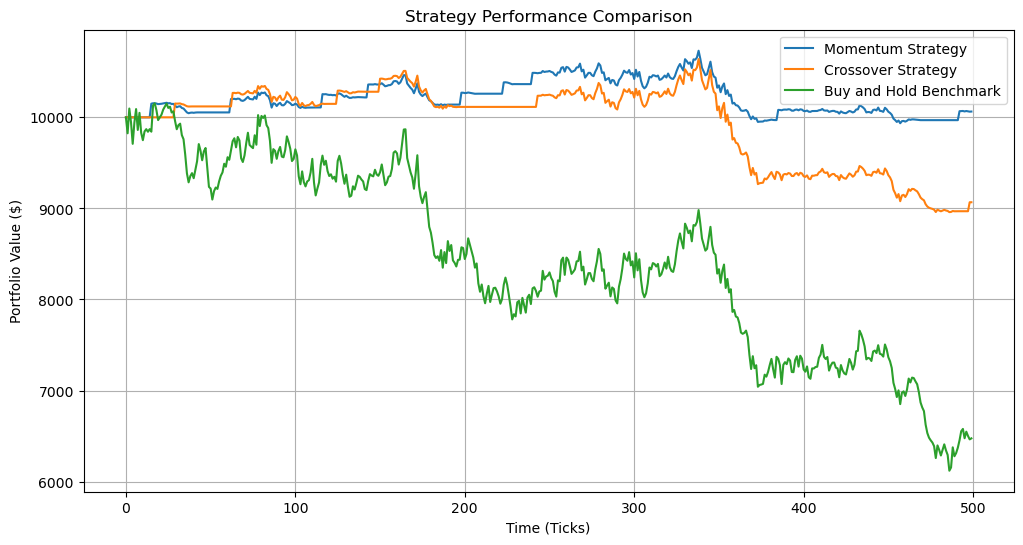

In [4]:
all_prices = [tick.price for tick in market_data_ticks]
first_price = all_prices[0]
buy_and_hold_equity = [(price / first_price) * INITIAL_CASH for price in all_prices]
plt.figure(figsize=(12, 6))

plt.plot(engine1.equity_curve, label='Momentum Strategy')
plt.plot(engine2.equity_curve, label='Crossover Strategy')
plt.plot(buy_and_hold_equity, label='Buy and Hold Benchmark')

plt.title('Strategy Performance Comparison')
plt.xlabel('Time (Ticks)')
plt.ylabel('Portfolio Value ($)')

plt.legend()
plt.grid(True)
plt.show()

### Results

This project worked out pretty well. We managed to create 2 strategies, run them and compare their results. Both strategies outperformed the Buy and hold strategy so thats good. But the strategies were super simple, we were not taking any short positions and we never used leverage and at each tick we never bought/sold more that one share of the stock. But over all a very cool project and we learned a lot.